In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df = pd.read_excel('../data/iris.xls')

In [4]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Standarlize the Data

In [5]:
features = ["sepallength",	"sepalwidth",	"petallength"	, "petalwidth"]
X = df.loc[:, features].values
y = df.loc[:, ["iris"]].values

In [6]:
pd.DataFrame(data= X, columns=features).head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Visualize

In [8]:
principalComponents = pca.fit_transform(X)
print(principalComponents)

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 

In [9]:
principalDf = pd.DataFrame(data=principalComponents, 
                           columns=['principal component 1', 
                                    'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [10]:
df[["iris"]].head()

,iris
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [11]:
pca_df = pd.concat([principalDf, df[["iris"]]], axis=1)
pca_df.head()

,principal component 1,principal component 2,iris
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


## Visualize 2D

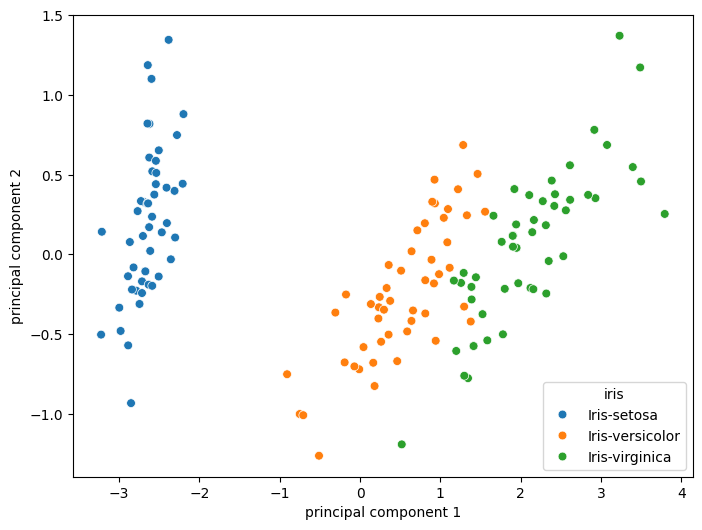

In [13]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data = pca_df, x='principal component 1', y='principal component 2', hue='iris', s=40)
plt.show()

## Explain 

In [14]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


Total of first 2 part account for 95.80%. 2 part left take up only more 4%  

## Explain vector

In [15]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [16]:
vects = pca.components_[1:2]

In [17]:
print(vects)

[[ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [18]:
vect_one = pd.Series(vects[0], index=features)

In [19]:
vect_one.sort_values(ascending=False)
vect_one = pd.Series(vects[0], index=features)

## Use LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(X, y)
lda_df = pd.DataFrame(data = lda_data, columns = ["principal component 1", "principal component 2"])

c:\Users\lhson\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
lda_df.head()

,principal component 1,principal component 2
0,8.084953,-0.328454
1,7.147163,0.755473
2,7.511378,0.238078
3,6.837676,0.642885
4,8.157814,-0.540639


In [22]:
lda_df = pd.concat([lda_df, df[["iris"]]], axis=1)

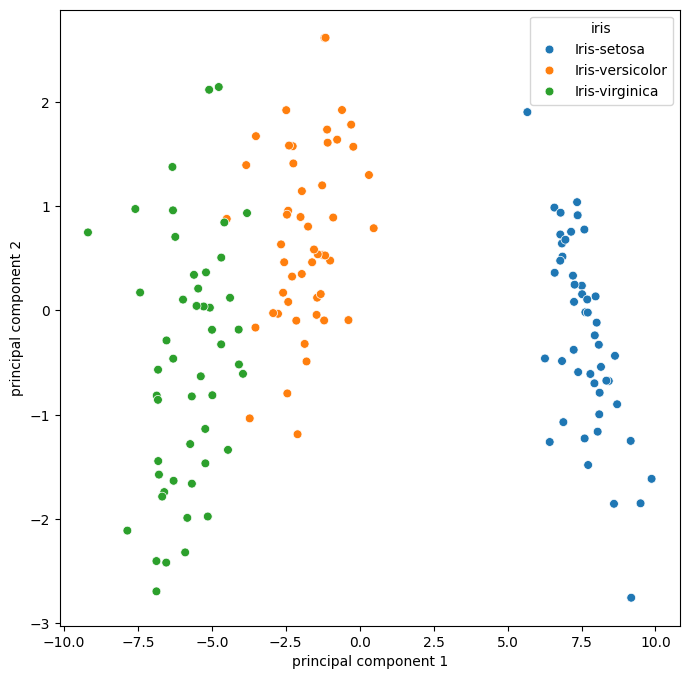

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = lda_df, x='principal component 1', y='principal component 2', hue='iris', s=40)
plt.show()